## **<center> Modelagem de sistema por função de transferência pulsada - Identificação Aeropêndulo</center>**


In [120]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *
import scienceplots

%config InlineBackend.figure_format='retina'
plt.style.use(["science", "notebook"])


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [121]:
from scipy import signal as sg
import matplotlib.pyplot as plt

### **Importando as bibliotecas usadas para a análise**

In [122]:
# arquivo_15_6_2023_23_10_43.csv
# file = "../../interface_aeropendulo/interface/dados_de_ensaio/arquivo_24_6_2023_19_2_54.csv"
file = "../../interface_aeropendulo/interface/dados_de_ensaio/arquivo_24_6_2023_21_14_28.csv"
# url_data = (r"https://raw.githubusercontent.com/Oseiasdfarias/Projeto_Tcc_Oseias_Oficial/main/interface_aeropendulo/interface/dados_de_ensaio/arquivo_24_6_2023_21_14_28.csv")
dados_malha_aberta = pd.read_csv(file, header=None, sep=',').values
dados_malha_aberta[0][0] = 0.0
dados_malha_aberta

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        5.00000e+00, 6.00000e+00],
       [0.00000e+00, 0.00000e+00, 4.27910e+01, ..., 1.50000e+00,
        1.50000e+00, 2.83400e+01],
       [1.00000e+00, 0.00000e+00, 4.21980e+01, ..., 1.50000e+00,
        1.50000e+00, 2.83600e+01],
       ...,
       [5.93300e+03, 0.00000e+00, 1.77360e+01, ..., 1.00000e+00,
        1.00000e+00, 1.46995e+02],
       [5.93400e+03, 0.00000e+00, 1.78680e+01, ..., 1.00000e+00,
        1.00000e+00, 1.47015e+02],
       [5.93500e+03, 0.00000e+00, 1.77360e+01, ..., 1.00000e+00,
        1.00000e+00, 1.47035e+02]])

### **Obtendo os sinais do ensaio**

In [123]:
tempo = np.array(dados_malha_aberta[:,7])
sinal_prbs_entrada  = np.array(dados_malha_aberta[:,6])
sinal_saida = np.array(dados_malha_aberta[:,2])

# Convertendo o sinal de Graus para Radianos
sinal_saida = np.deg2rad(sinal_saida)

## Plotagem dos sinais

###  **Sinais de Entrada e de Saída**

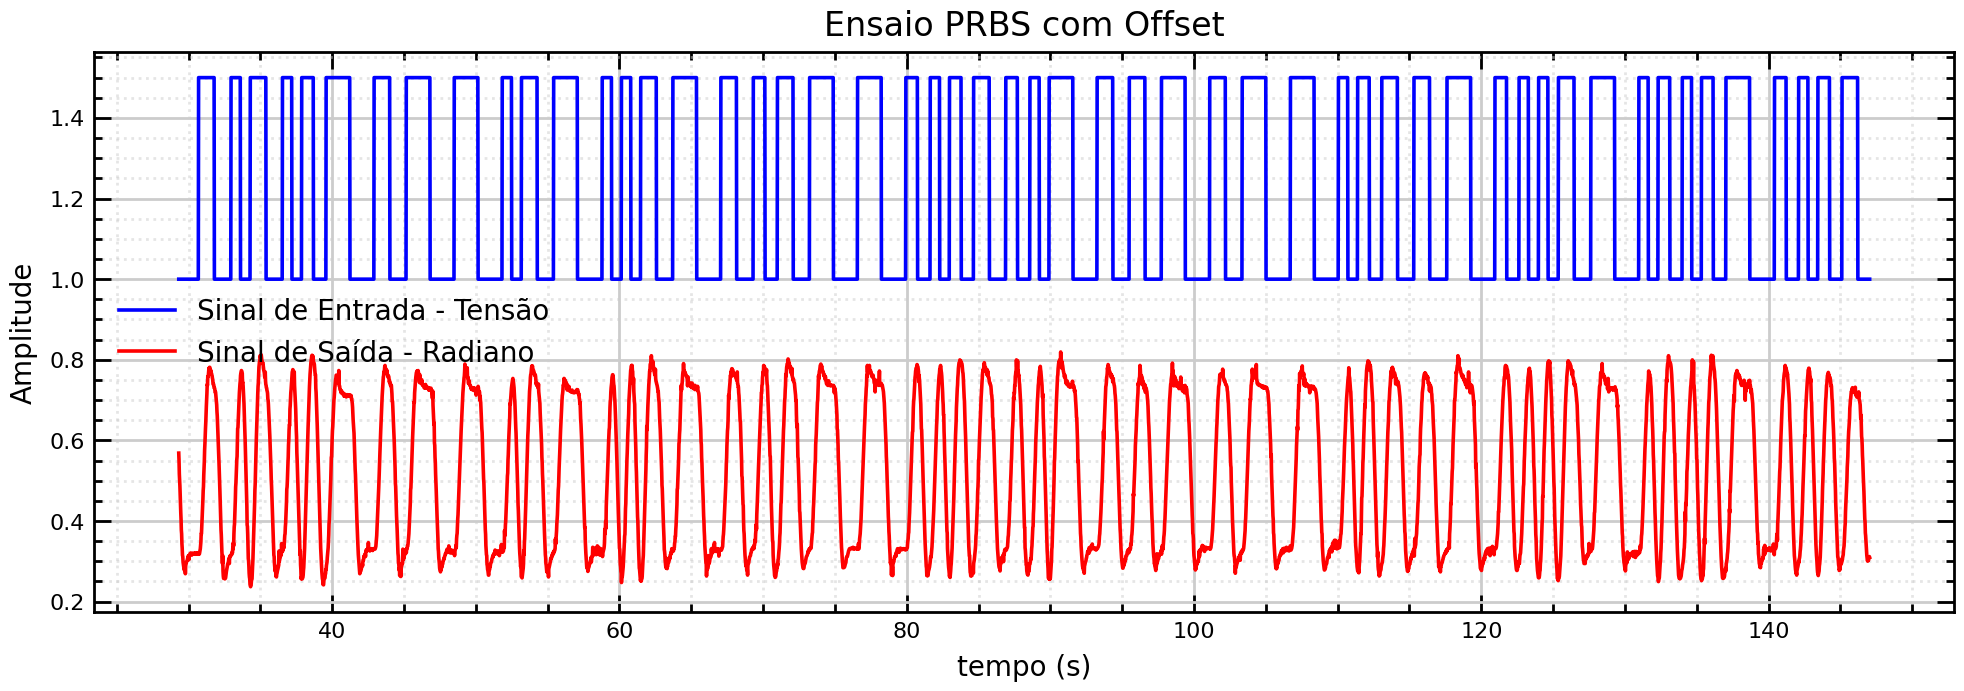

In [124]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_prbs_entrada[50:],
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[50:], (sinal_saida[50:]),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")

plt. title('Ensaio PRBS com Offset', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

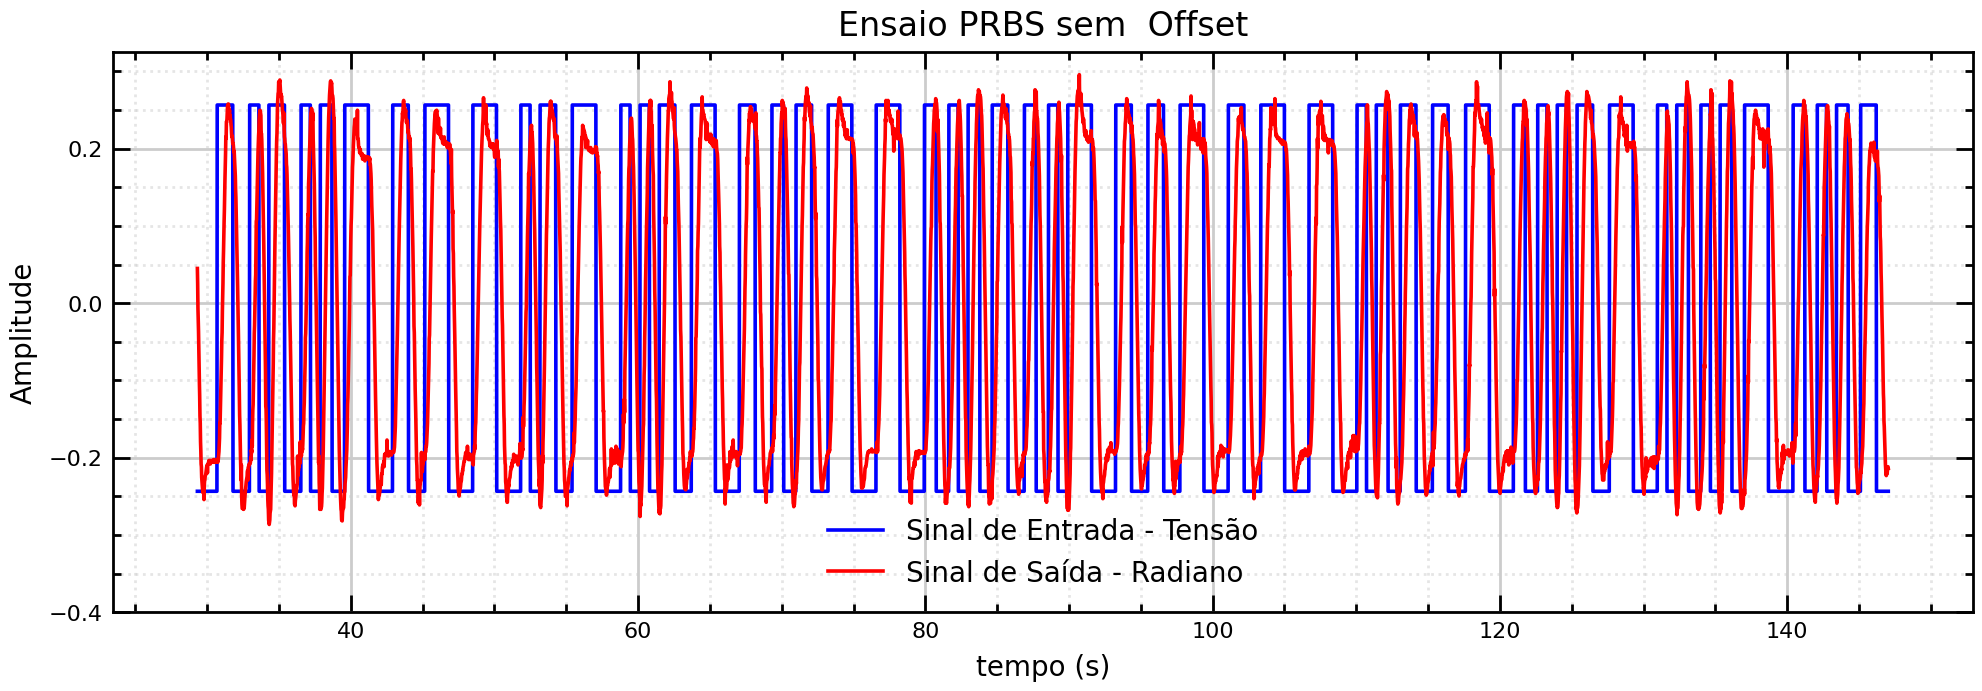

In [125]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(tempo[50:], sinal_prbs_entrada[50:] - np.mean(sinal_prbs_entrada[50:]),
         c = 'b', lw=1.3, label = "Sinal de Entrada - Tensão")
plt.plot(tempo[50:], (sinal_saida[50:]) - np.mean((sinal_saida[50:])),
         c = 'r', lw=1.3, label = "Sinal de Saída - Radiano")

plt. title('Ensaio PRBS sem  Offset', fontsize=12)
plt.ylabel('Amplitude', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10)
plt.yticks(np.arange(-0.4, 0.4, 0.2))

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

In [126]:
N = len(sinal_prbs_entrada)

In [127]:
percIdent = 0.6             # Percentual dos dados de identificação:
Ni = int(percIdent * N)     # Quantidade de amostras para identificação:
Ni

3562

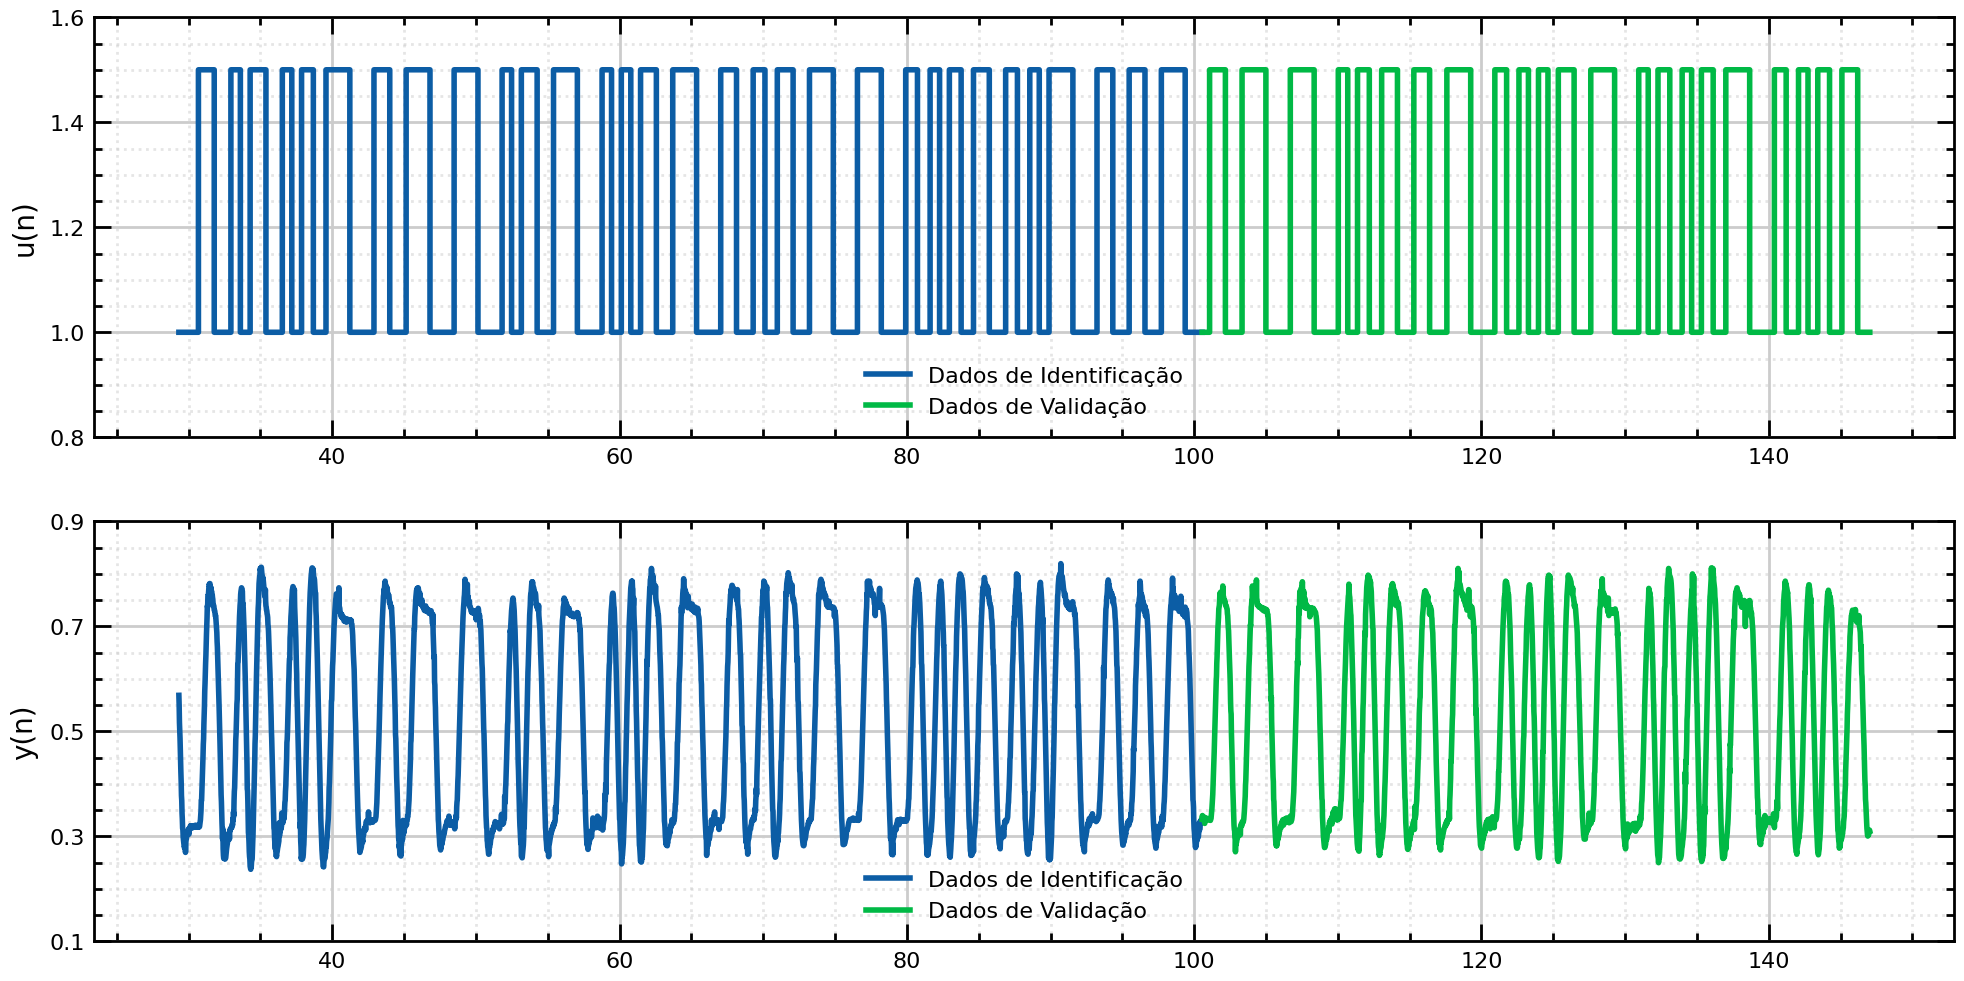

In [128]:
u1 = sinal_prbs_entrada[50:]
yout = sinal_saida[50:]
t = tempo[50:]

plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[:Ni+1],u1[:Ni+1],label='Dados de Identificação')
plt.step(t[Ni:],u1[Ni:],label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1],yout[:Ni+1], label='Dados de Identificação')
plt.plot(t[Ni:],yout[Ni:],label='Dados de Validação')
plt.yticks(np.arange(0.1, 1, 0.2))
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

In [129]:
# Matriz de regressão:
nb = 3
na = 2
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)
# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(3562, 5)


array([ 1.55664987, -0.57365455, -0.00561815,  0.00530754,  0.00790203])

In [130]:
Ts = np.mean(np.diff(tempo))
Ts

0.02375926549865229

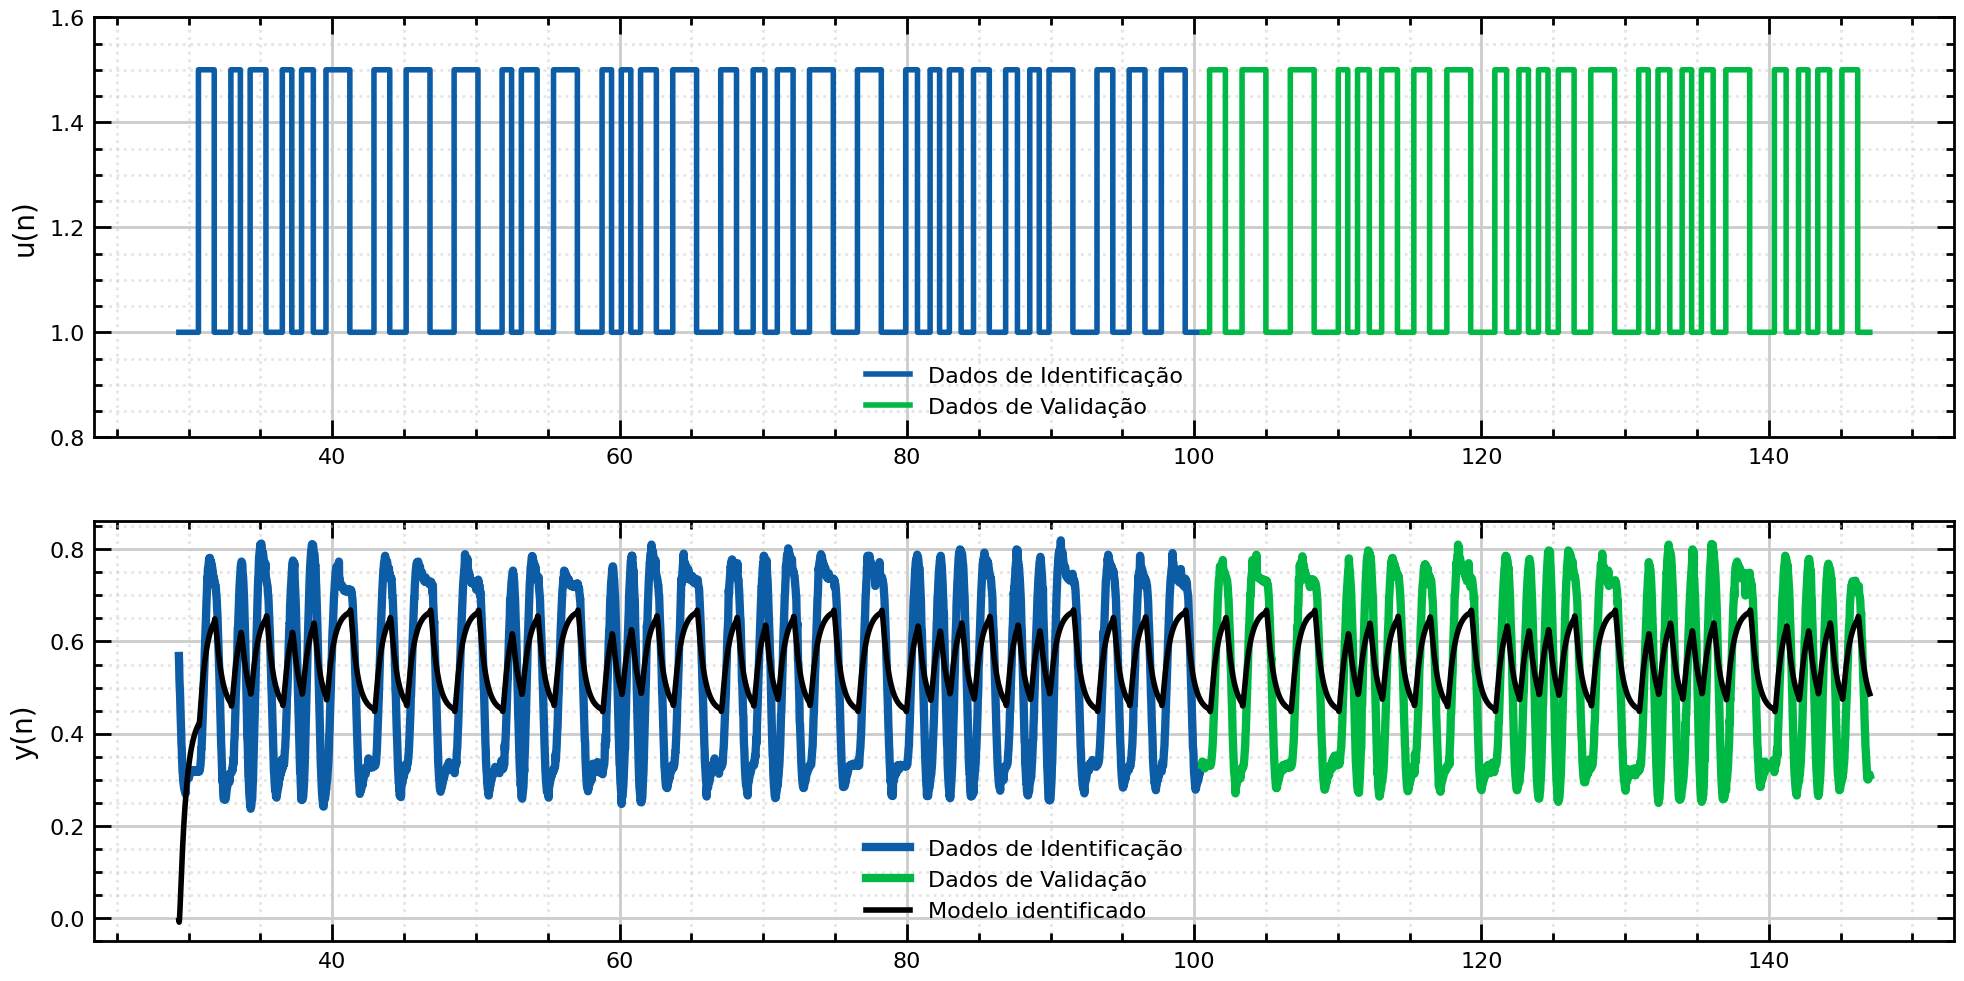

TransferFunction(array([-0.00561815,  0.00530754,  0.00790203]), array([ 1.        , -1.55664987,  0.57365455]), 0.02375926549865229)

In [131]:
a1 = thetaA[0]
a2 = thetaA[1]
b0 = thetaA[2]
b1 = thetaA[3]
b2 = thetaA[4]
Ba = [b0 , b1, b2]
Aa = [1, -a1, -a2]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth=3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth=3.0, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

Gz

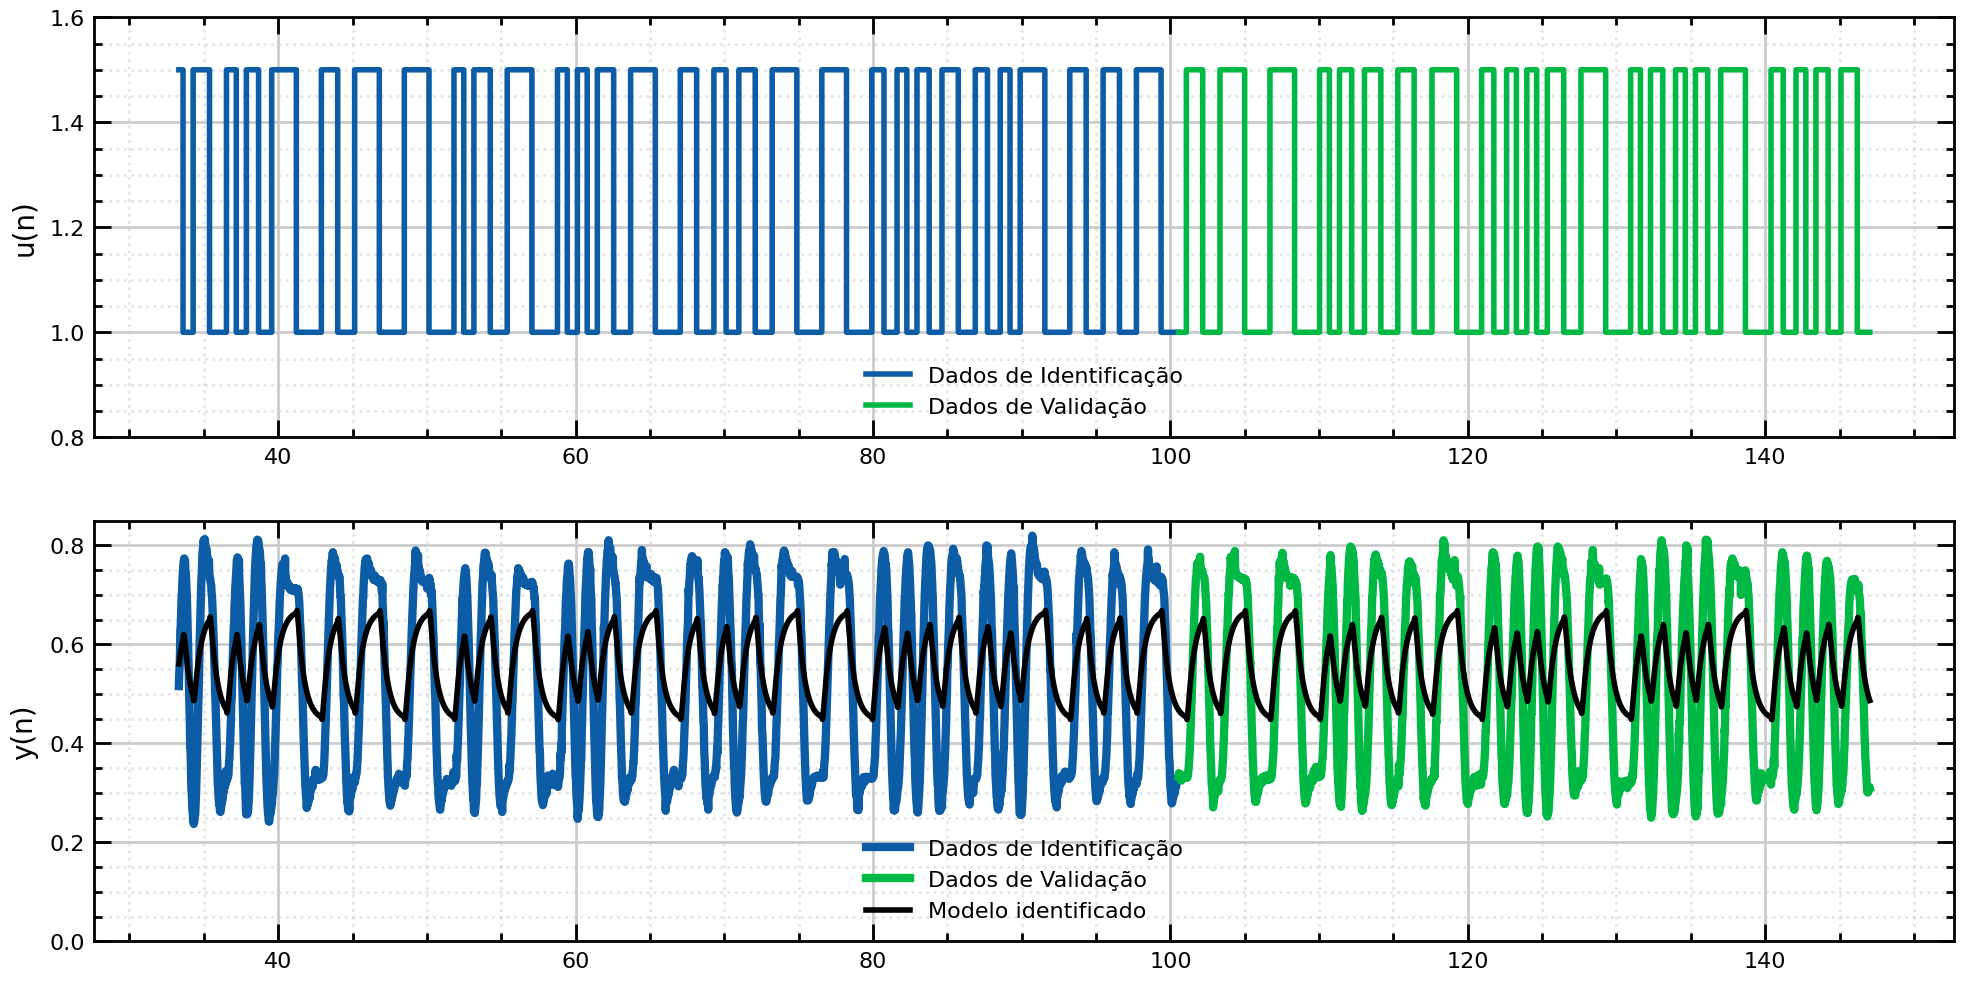

TransferFunction(array([-0.00561815,  0.00530754,  0.00790203]), array([ 1.        , -1.55664987,  0.57365455]), 0.02375926549865229)

In [132]:
a1 = thetaA[0]
a2 = thetaA[1]
b0 = thetaA[2]
b1 = thetaA[3]
b2 = thetaA[4]
Ba = [b0 , b1, b2]
Aa = [1, -a1, -a2]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[200:Ni+1],u1[200:Ni+1],label='Dados de Identificação')
plt.step(t[Ni:],u1[Ni:],label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.subplot(212)
plt.plot(t[200:Ni+1], yout[200:Ni+1], linewidth=3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth=3.0, label='Dados de Validação')
plt.plot(t[200:], yp[200:], 'k',label='Modelo identificado')
plt.yticks(np.arange(0, 1, 0.2))
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

Gz

In [133]:
# Matriz de regressão:
nb = 2
na = 5
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)
# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(3562, 7)


array([ 0.83901799,  0.41601352,  0.12765569, -0.07264943, -0.32883369,
       -0.0036955 ,  0.01170626])

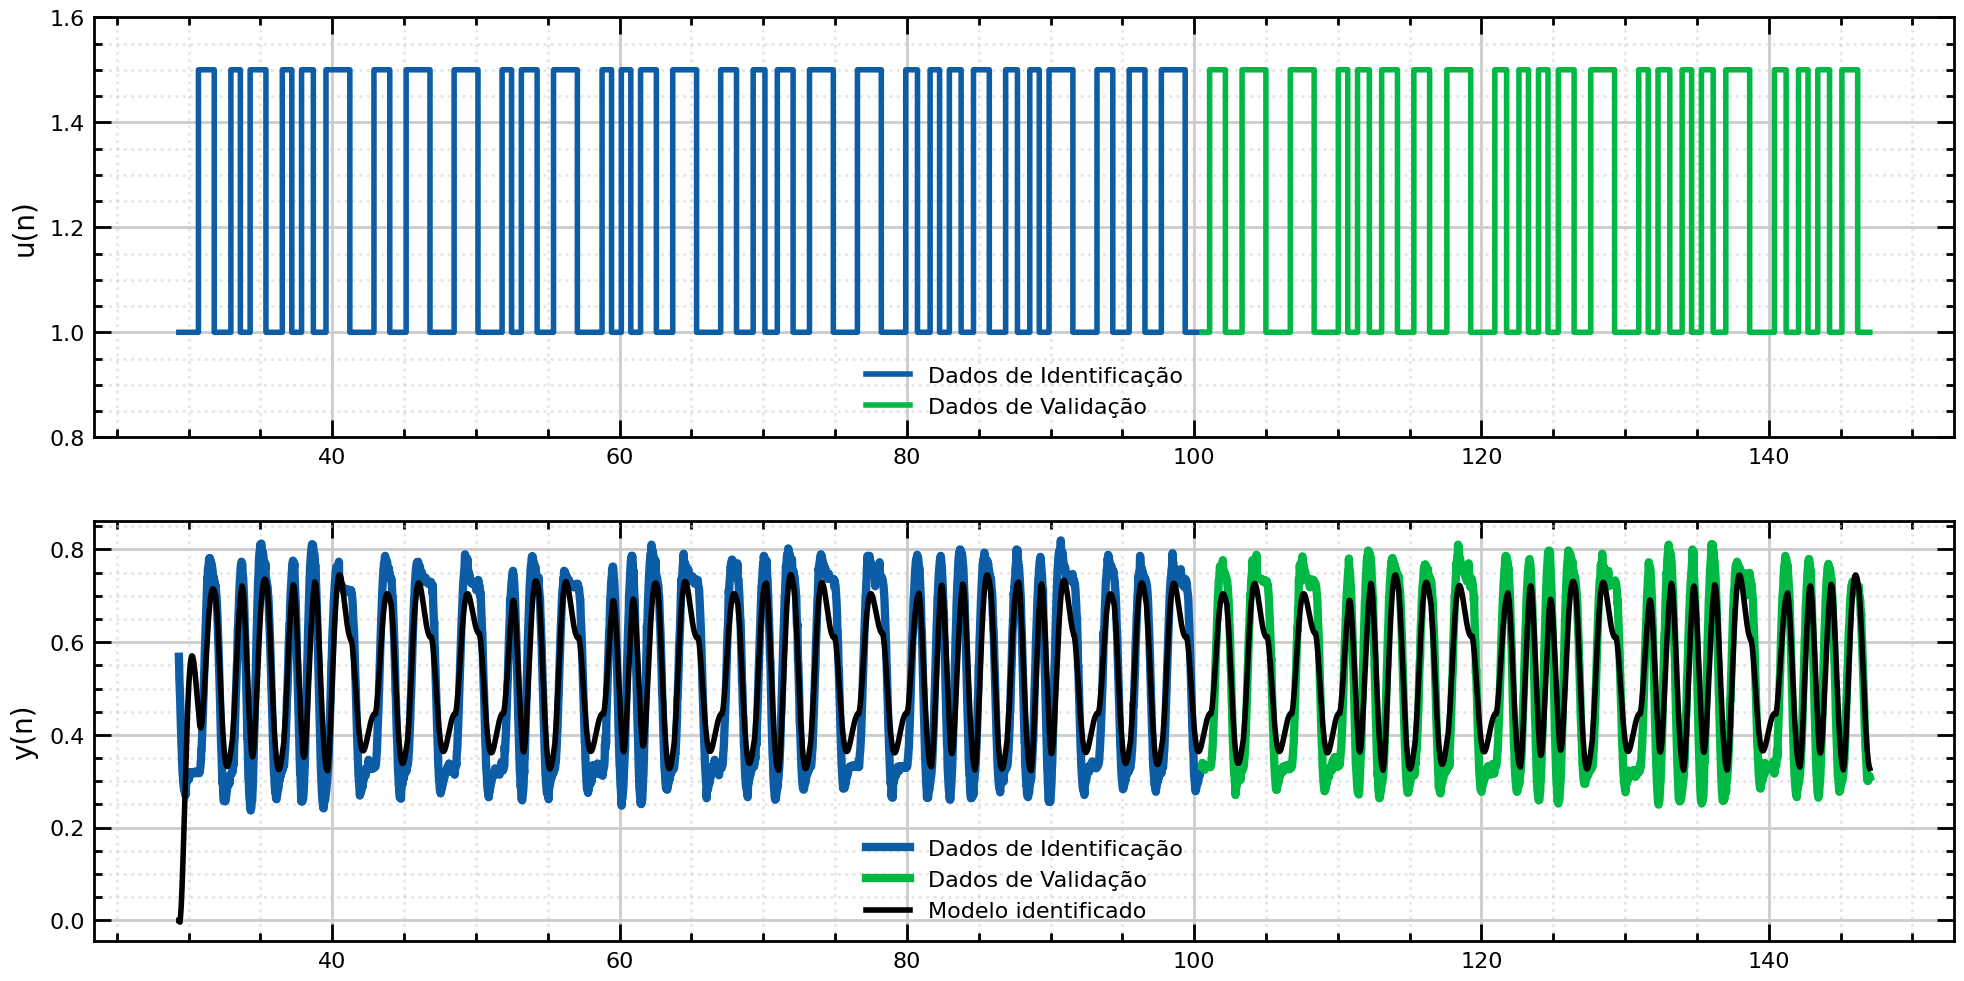

TransferFunction(array([-0.0036955 ,  0.01170626]), array([ 1.        , -0.83901799, -0.41601352, -0.12765569,  0.07264943,
        0.32883369]), 0.02375926549865229)

In [134]:
import control as ct

a1, a2, a3, a4, a5 = thetaA[:5]
b0, b1 = thetaA[5:]

Aa = [1, -a1, -a2, -a3, -a4, -a5]
Ba = [b0 , b1]

Gz = ct.tf(Ba, Aa, Ts)
_, yp = ct.forced_response(Gz, U=u1)

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.step(t[:Ni+1], u1[:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[:Ni+1], yout[:Ni+1], linewidth = 3.0, label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:], linewidth = 3.0, label='Dados de Validação')
plt.plot(t, yp, 'k', label='Modelo identificado')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.ylabel('y(n)')
plt.show()

Gz

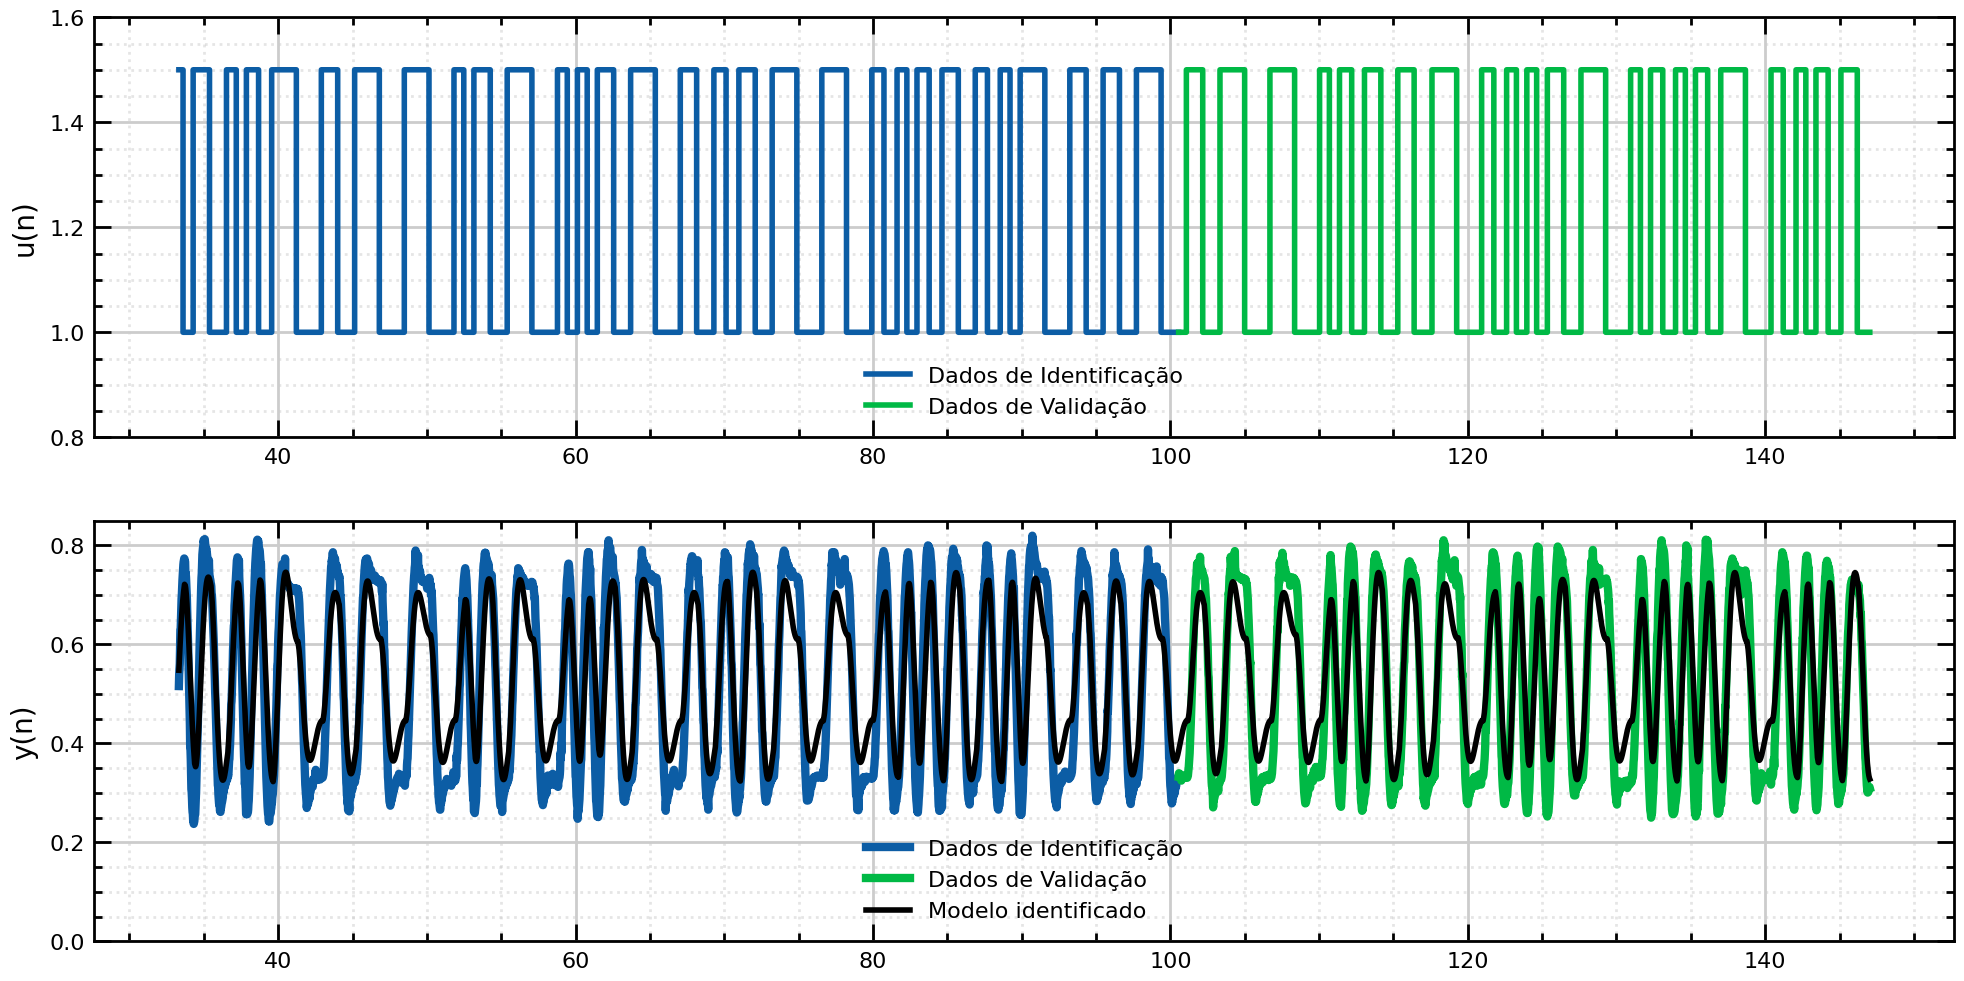

In [135]:
plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[200:Ni+1], u1[200:Ni+1], label='Dados de Identificação')
plt.step(t[Ni:], u1[Ni:], label='Dados de Validação')
plt.yticks(np.arange(0.8, 1.8, 0.2))
plt.ylabel('u(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


plt.subplot(212)
plt.plot(t[200:Ni+1], yout[200:Ni+1], linewidth = 3.0,label='Dados de Identificação')
plt.plot(t[Ni:], yout[Ni:],linewidth = 3.0,label='Dados de Validação')
plt.plot(t[200:], yp[200:],'k', label='Modelo identificado')
plt.yticks(np.arange(0, 1, 0.2))
plt.ylabel('y(n)')
plt.legend(loc="lower center")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()